In [1]:
from manim import *
import matplotlib.pyplot as plt

Manim Community v0.17.1

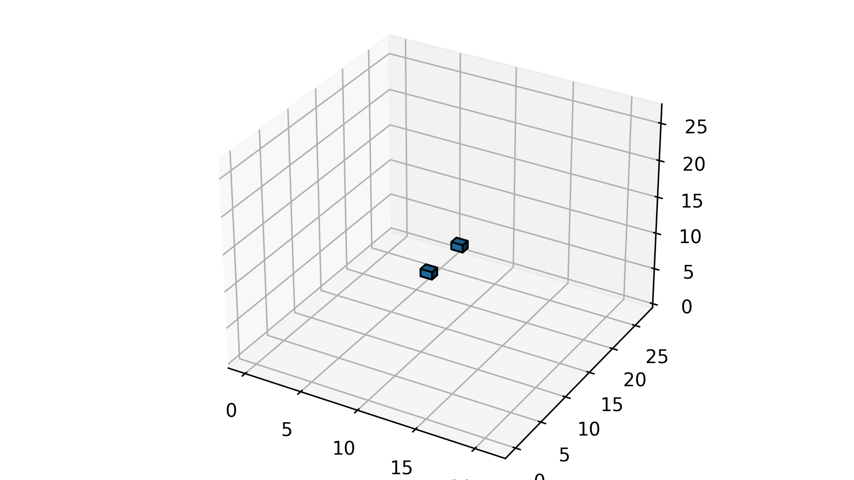

In [2]:
class Example(Scene):
    def construct(self):
        self.camera.background_color= WHITE
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(projection='3d')
        x=np.full((21,27,27),0)
        x[10,10,10]=1
        x[10,16,10]=1
        ax.voxels(x, edgecolor='k')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        img = ImageMobject(buf).scale(1)
        plt.close(fig)
        self.add(img)
        
%manim -v WARNING -ql -s --disable_caching --progress_bar None Example

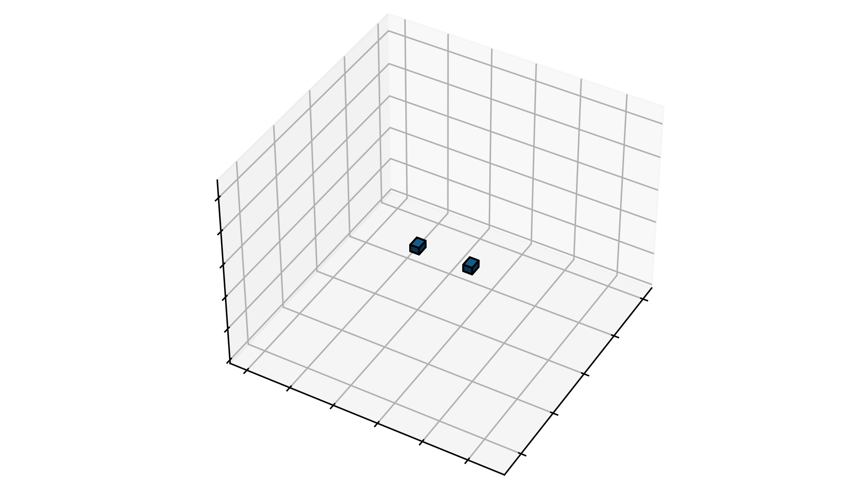

In [3]:
def mpl_image3d_plt(amp1,x):
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=40+3*np.sin(amp1), azim=20+10*np.cos(amp1))
    ax.voxels(x, edgecolor='k')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    fig.canvas.draw()
    buf = fig.canvas.buffer_rgba()
    img = ImageMobject(buf).scale(1)
    plt.close(fig)
    return img


class Example(Scene):
    def construct(self):
        self.camera.background_color= WHITE
        x=np.full((21,27,27),0)
        x[10,10,10]=1
        x[10,16,10]=1
        amp1=0
        amp2=TAU
        tr_amplitude = ValueTracker(amp1)
        image = mpl_image3d_plt(amp1, x)
        self.add(image)

        def update_image(mob):
            new_mob = mpl_image3d_plt(tr_amplitude.get_value(), x)
            mob.become(new_mob)

        image.add_updater(update_image)
        self.play(tr_amplitude.animate.set_value(amp2), run_time=4)

%manim -v WARNING -ql -s --disable_caching --progress_bar None Example